In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import fftpack


In [28]:
def samplingLoop(N, w, F):
    for i in range(N):
        for j in range(N):
            r2 = (i - N//2)**2 + (j - N//2)**2
            
            if r2 > round(N//2 * w)**2:
                F[i, j] = 0
    return F

In [29]:
def downsampling(I, m, filter_option):
    # Downsample the square image I by a factor of m
    N, M = I.shape
    
    # Apply ideal filter
    w = 1/m
    F = fftpack.fftshift(fftpack.fft2(I))
    
    if filter_option == 'FILTER_ON':
        F = samplingLoop(N, w, F)
    
    Idown = np.real(fftpack.ifft2(fftpack.ifftshift(F)))
    
    # Now downsample
    Idown = np.array(Image.fromarray(Idown).resize((N // m, N // m), Image.NEAREST))
    
    return Idown

In [38]:
def upsampling(I, m):
    # Upsample the square image I by a factor of m
    N, M = I.shape
    Iup = np.zeros((m*N, m*N))

    # Expand input image
    for i in range(N):
        for j in range(N):
            Iup[m*i, m*j] = I[i,j]
    
    # Ideal filter
    N, M = Iup.shape
    w = 1/m
    F = fftpack.fftshift(fftpack.fft2(Iup))

    F = samplingLoop(N, w, F)

    Iup = (m*m) * np.abs(fftpack.ifft2(fftpack.ifftshift(F)))

    return Iup

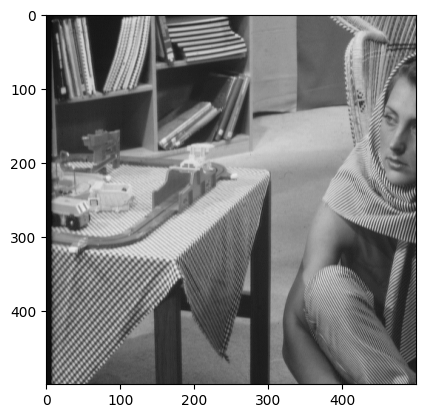

In [32]:
m = 2

f1 = np.array(Image.open('assets/barbara.gif').convert('L'))
f1 = f1[:500, :500]

plt.figure()
plt.imshow(f1, cmap='gray', vmin=0, vmax=255)

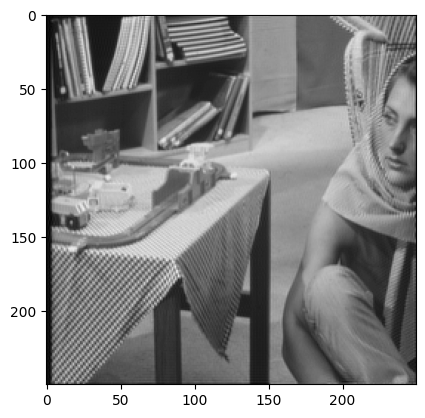

In [42]:
# Downsample
# f2 = downsampling(f1, m, 'FILTER_OFF')
f2 = downsampling(f1, m, 'FILTER_ON')

plt.figure()
plt.imshow(f2, cmap='gray', vmin=0, vmax=255)

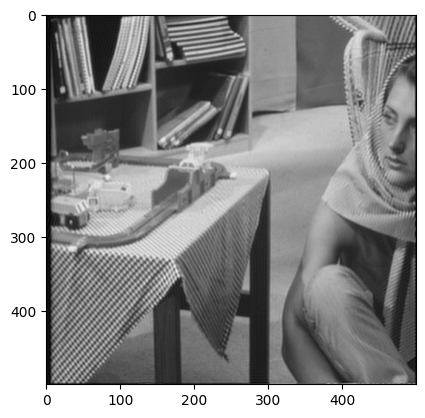

In [43]:
# Upsample
f3 = upsampling(f2, m)

plt.figure()
plt.imshow(f3, cmap='gray', vmin=0, vmax=255)